# How to choose Loos Function when Training Deep Learing Neural Networks
* 1. Regression Loss Functions
    * 1. Mean Squared Error Loss
    * 2. Mean Squared Logarithmic Error Loss
    * 3. Mean Absoulute Error Loss
* 2. Binary Classification Loss Functions
    * 1. Binary Cross-Entropy
    * 2. Hinge Loss
    * 3. Squared Hinge Loss
* 3. Multi-Class Classification Loss Function
    * 1. Multi-Class Cross-Entropy Loss
    * 2. Sparse Multiclass Cross-Entropy Loss
    * 3. Kullback Leibler Divergence Loss

## Regression Loss Function
A regression predictive modeling problem involves predicting a real-valued quantity.

### Mean Squared Error Loss
The Mean Squared Error, or MSE, loss is the default loss to use for regression problems.

Mathematically, it is the preferred loss function under the inference framework of maximum likelihood if the distribution of the target variable is Gaussian. It is the loss function to be evaluated first and only changed if you have a good reason.

Mean squared error is calculated as the average of the squared differences between the predicted and actual values. The result is always positive regardless of the sign of the predicted and actual values and a perfect value is 0.0. The squaring means that larger mistakes result in more error than smaller mistakes, meaning that the model is punished for making larger mistakes.

The output layer has one node for the target variable and the linear activation function is used.

In [ ]:
model.add(Dense(1, activation='linear'))
model.compile(loss="mse")

### Mean Squared Logarithmic Error Loss
There may be regression problems in which the target value has a spread of values and when predicting a large value, you may not want to punish a model as heavily as mean squared error.

Instead, you can first calculate the natural logarithm of each of the predicted values, then calculate the mean squared error. This is called the Mean Squared Logarithmic Error loss, or MSLE for short.

It has the effect of relaxing the punishing effect of large differences in large predicted values.

As a loss measure, it may be more appropriate when the model is predicting unscaled quantities directly. Nevertheless, we can demonstrate this loss function using our simple regression problem.

In [ ]:
model.compile(loss='mean_squared_logarithmic_error', optimizer=opt, metrics=['mse'])

### Mean Absolute Error Loss
On some regression problems, the distribution of the target variable may be mostly Gaussian, but may have outliers, e.g. large or small values far from the mean value.

The Mean Absolute Error, or MAE, loss is an appropriate loss function in this case as it is more robust to outliers. It is calculated as the average of the absolute difference between the actual and predicted values.

In [ ]:
model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mse'])

## Binary Classification Loss Functions
Binary classification are those predictive modeling problems where examples are assigned one of two labels.

The problem is often framed as predicting a value of 0 or 1 for the first or second class and is often implemented as predicting the probability of the example belonging to class value 1.

In this section, we will investigate loss functions that are appropriate for binary classification predictive modeling problems.

We will generate examples from the circles test problem in scikit-learn as the basis for this investigation. The circles problem involves samples drawn from two concentric circles on a two-dimensional plane, where points on the outer circle belong to class 0 and points for the inner circle belong to class 1. Statistical noise is added to the samples to add ambiguity and make the problem more challenging to learn.

### Binary Cross-Entropy Loss
Cross-entropy is the default loss function to use for binary classification problems.

It is intended for use with binary classification where the target values are in the set {0, 1}.

Mathematically, it is the preferred loss function under the inference framework of maximum likelihood. It is the loss function to be evaluated first and only changed if you have a good reason.

Cross-entropy will calculate a score that summarizes the average difference between the actual and predicted probability distributions for predicting class 1. The score is minimized and a perfect cross-entropy value is 0.

In [ ]:
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

### Hinge Loss
An alternative to cross-entropy for binary classification problems is the hinge loss function, primarily developed for use with Support Vector Machine (SVM) models.

It is intended for use with binary classification where the target values are in the set {-1, 1}.

The hinge loss function encourages examples to have the correct sign, assigning more error when there is a difference in the sign between the actual and predicted class values.

Reports of performance with the hinge loss are mixed, sometimes resulting in better performance than cross-entropy on binary classification problems.

The target variable must be modified to have values in the set {-1, 1}.

In [ ]:
# change y from {0,1} to {-1,1}
y[where(y == 0)] = -1

"""the output layer of the network must be configured to have a single node with a hyperbolic tangent activation function 
capable of outputting a single value in the range [-1, 1]."""

model.add(Dense(1, activation='tanh'))
model.compile(loss='hinge', optimizer=opt, metrics=['accuracy'])

### Squared Hinge Loss
The hinge loss function has many extensions, often the subject of investigation with SVM models.

A popular extension is called the squared hinge loss that simply calculates the square of the score hinge loss. It has the effect of smoothing the surface of the error function and making it numerically easier to work with.

If using a hinge loss does result in better performance on a given binary classification problem, is likely that a squared hinge loss may be appropriate.

As with using the hinge loss function, the target variable must be modified to have values in the set {-1, 1}.

In [ ]:
# change y from {0,1} to {-1,1}
y[where(y == 0)] = -1

"""And the output layer must use a single node with a hyperbolic tangent activation function 
capable of outputting continuous values in the range [-1, 1]."""

model.add(Dense(1, activation='tanh'))

model.compile(loss='squared_hinge', optimizer=opt, metrics=['accuracy'])

## Multi-Class Classification Loss Functions
Multi-Class classification are those predictive modeling problems where examples are assigned one of more than two classes.

The problem is often framed as predicting an integer value, where each class is assigned a unique integer value from 0 to (num_classes – 1). The problem is often implemented as predicting the probability of the example belonging to each known class.

In this section, we will investigate loss functions that are appropriate for multi-class classification predictive modeling problems.

### Multi-Class Cross-Entropy Loss
Cross-entropy is the default loss function to use for multi-class classification problems.

In this case, it is intended for use with multi-class classification where the target values are in the set {0, 1, 3, …, n}, where each class is assigned a unique integer value.

Mathematically, it is the preferred loss function under the inference framework of maximum likelihood. It is the loss function to be evaluated first and only changed if you have a good reason.

Cross-entropy will calculate a score that summarizes the average difference between the actual and predicted probability distributions for all classes in the problem. The score is minimized and a perfect cross-entropy value is 0.

In [ ]:
"""# This is to ensure that each example has an expected probability of 1.0 
# for the actual class value and an expected probability of 0.0 
# for all other class values."""

# one hot encode output variable
y = to_categorical(y)

model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

### Sparse Multiclass Cross-Entropy Loss
A possible cause of frustration when using cross-entropy with classification problems with a large number of labels is the one hot encoding process.

For example, predicting words in a vocabulary may have tens or hundreds of thousands of categories, one for each label. This can mean that the target element of each training example may require a one hot encoded vector with tens or hundreds of thousands of zero values, requiring significant memory.

Sparse cross-entropy addresses this by performing the same cross-entropy calculation of error, without requiring that the target variable be one hot encoded prior to trainin

In [ ]:
"""The function requires that the output layer is configured with an n nodes (one for each class), 
in this case three nodes, and a ‘softmax‘ activation in order to predict the probability for each class."""
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

### Kullback Leibler Divergence Loss
Kullback Leibler Divergence, or KL Divergence for short, is a measure of how one probability distribution differs from a baseline distribution.

A KL divergence loss of 0 suggests the distributions are identical. In practice, the behavior of KL Divergence is very similar to cross-entropy. It calculates how much information is lost (in terms of bits) if the predicted probability distribution is used to approximate the desired target probability distribution.

As such, the KL divergence loss function is more commonly used when using models that learn to approximate a more complex function than simply multi-class classification, such as in the case of an autoencoder used for learning a dense feature representation under a model that must reconstruct the original input. In this case, KL divergence loss would be preferred. Nevertheless, it can be used for multi-class classification, in which case it is functionally equivalent to multi-class cross-entropy.

In [ ]:
""" Also, as with categorical cross-entropy, we must one hot encode the target variable 
to have an expected probability of 1.0 for the class value and 0.0 
for all other class values.
"""
# one hot encode output variable
y = to_categorical(y)

model.compile(loss='kullback_leibler_divergence', optimizer=opt, metrics=['accuracy'])

# Learning Rate, Batch Size, and Other Hyperparameters
The numbers of hidden layers and neurons are not only hyperparameters you can tweak in an Multi-layer Perceptron (MLP). Here are some of the most important ones, as well as tips on how to set them:

* **Learning rate**: The learning rate is arguably the most important hyperparameter. In general, the optimal learning rate is about half of the maximum learning rate (i.e., the learning rate above which the training algorithm diverges). One way to find a good learning rate is to train the model for a few hundred iterations, starting with a very low learning rate (e.g., 10 ) and gradually increasing it up to a very large value (e.g., 10). This is done by multiplying the learning rate by a constant factor at each iteration (e.g., by exp(log(10 )/500) to go from 10 to 10 in 500 iterations). If you plot the loss as a function of the learning rate (using a log scale for the learning rate), you should see it dropping at first. But after a while, the learning rate will be too large, so the loss will shoot back up: the optimal learning rate will be a bit lower than the point at which the loss starts to climb (typically about 10 times lower than the turning point). You can then reinitialize your model and train it normally using this good learning rate.

* **Optimizer**: Choosing a better optimizer than plain old Mini-batch Gradient Descent (and tuning its hyperparameters) is also quite important.

* **Batch size**: The batch size can have a significant impact on your model’s performance and training time. The main benefit of using large batch sizes is that hardware accelerators like GPUs can process them efficiently, so the training algorithm will see more instances per second. Therefore, many researchers and practitioners recommend using the largest batch size that can fit in GPU RAM. There’s a catch, though: in practice, large batch sizes often lead to training instabilities, especially at the beginning of training, and the resulting model may not generalize as well as a model trained with a small batch size. So, one strategy is to try to use a large batch size, using learning rate warmup, and if training is unstable or the final performance is disappointing, then try using a small batch size instead. 

* **Activation functions**: We discussed how to choose the activation function earlier later.  In general, the ReLU activation function will be a good default for all hidden layers. For the output layer, it really depends on your task.

* **Num of iterations**: In most cases, the number of training iterations does not actually need to be tweaked: just use early stopping instead.

## Fine-Tuning Neural Network Hyperparameters

In [5]:
from tensorflow import keras
import numpy as np
import tensorflow as tf

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [6]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

This function creates a simple `Sequential` model for univariate regression (only one output neuron), with the given input shape and the given number of hidden layers and neurons, and it compiles it using an `SGD` optimizer configured with the specified learning rate. It is good practice to provide reasonable defaults to as many hyperparameters as you can, as Scikit-Learn
does.

In [7]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

let’s create a `KerasRegressor` based on this `build_model()` function:

In [8]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

Now we can use this object like a regular Scikit-Learn regressor: we can train it using its `fit()` method, then evaluate it using its `score()` method, and use it to make predictions using its `predict()` method, as you can see in the following code:

In [9]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 2s 3ms/step - loss: 1.5673 - val_loss: 20.7721
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 1.3216 - val_loss: 5.0266
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5972 - val_loss: 0.5490
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4985 - val_loss: 0.4529
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4608 - val_loss: 0.4188
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4410 - val_loss: 0.4129
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4463 - val_loss: 0.4004
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4283 - val_loss: 0.3944
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4139 - val_loss: 0.3961
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4107 - val_l

In [10]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3412


In [12]:
X_new = X_test[:3]
y_pred = keras_reg.predict(X_new)

In [13]:
np.random.seed(42)
tf.random.set_seed(42)

We don’t want to train and evaluate a single model like this, though we want to train hundreds of variants and see which one performs best on the validation set. Since there are many hyperparameters, it is preferable to use a randomized search rather than grid search. Let’s try to explore the number of hidden layers, the number of neurons, and the learning rate:

**Warning**: the following cell crashes at the end of training. This seems to be caused by [Keras issue #13586](https://github.com/keras-team/keras/issues/13586), which was triggered by a recent change in Scikit-Learn. [Pull Request #13598](https://github.com/keras-team/keras/pull/13598) seems to fix the issue, so this problem should be resolved soon. In the meantime, I've added `.tolist()` and `.rvs(1000).tolist()` as workarounds.

In [14]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.3827 - val_loss: 0.4703
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4880 - val_loss: 0.4247
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4541 - val_loss: 0.4052
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4518 - val_loss: 0.3975
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4337 - val_loss: 0.3991
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4263 - val_loss: 0.4031
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4385 - val_loss: 0.4043
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4301 - val_loss: 0.3929
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4108 - val_loss: 0.4040
Epoch 10/100
242/242 [========

Epoch 7/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3580 - val_loss: 0.8462
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3622 - val_loss: 0.8724
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3518 - val_loss: 0.9645
Epoch 10/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3560 - val_loss: 0.7225
Epoch 11/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3517 - val_loss: 0.7257
Epoch 12/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3367 - val_loss: 0.7217
Epoch 13/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3334 - val_loss: 0.8443
Epoch 14/100
121/121 [==============================] - 0s 2ms/step - loss: 0.3650
[CV] END learning_rate=0.005432590230265343, n_hidden=2, n_neurons=94; total time=  13.8s
Epoch 1/100
242/242 [==============================] - 1s 4ms/step - loss: 1.7832 - val_loss: 2.9433
Epoch 2/100
242

Epoch 16/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6364 - val_loss: 1.5300
Epoch 17/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6425 - val_loss: 1.3410
Epoch 18/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6340 - val_loss: 1.1762
Epoch 19/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6140 - val_loss: 1.0345
Epoch 20/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6101 - val_loss: 0.9174
Epoch 21/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5938 - val_loss: 0.8153
Epoch 22/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5975 - val_loss: 0.7363
Epoch 23/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5957 - val_loss: 0.6696
Epoch 24/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5714 - val_loss: 0.6187
Epoch 25/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5535

Epoch 56/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4620 - val_loss: 0.4349
Epoch 57/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4542 - val_loss: 0.4330
Epoch 58/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4659 - val_loss: 0.4311
Epoch 59/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4584 - val_loss: 0.4291
Epoch 60/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4684 - val_loss: 0.4277
Epoch 61/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4678 - val_loss: 0.4257
Epoch 62/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4516 - val_loss: 0.4241
Epoch 63/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4410 - val_loss: 0.4224
Epoch 64/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4622 - val_loss: 0.4208
Epoch 65/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4594

Epoch 35/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3499 - val_loss: 0.3474
Epoch 36/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3469 - val_loss: 0.3944
Epoch 37/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3453 - val_loss: 0.4401
Epoch 38/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3539 - val_loss: 0.4721
Epoch 39/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3449 - val_loss: 0.3722
Epoch 40/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3307 - val_loss: 0.4019
Epoch 41/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3408 - val_loss: 0.3376
Epoch 42/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3456 - val_loss: 0.3377
Epoch 43/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3436 - val_loss: 0.3354
Epoch 44/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3430

242/242 [==============================] - 1s 3ms/step - loss: 2.4646 - val_loss: 559.4488
Epoch 22/100
121/121 [==============================] - 0s 3ms/step - loss: 0.6226
[CV] END learning_rate=0.01824796188192035, n_hidden=0, n_neurons=40; total time=  14.8s
Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.9862 - val_loss: 1.4543
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6404 - val_loss: 0.9557
Epoch 3/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5532 - val_loss: 0.4628
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4956 - val_loss: 0.4214
Epoch 5/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4377 - val_loss: 0.3984
Epoch 6/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4032 - val_loss: 0.4056
Epoch 7/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4015 - val_loss: 0.3741
Epoch 8/100
242/242 [=========

242/242 [==============================] - 1s 4ms/step - loss: 0.3300 - val_loss: 0.3333
Epoch 40/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3192 - val_loss: 0.4050
Epoch 41/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3023 - val_loss: 0.3326
Epoch 42/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3030 - val_loss: 0.3593
Epoch 43/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3221 - val_loss: 0.3245
Epoch 44/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3249 - val_loss: 0.3830
Epoch 45/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3108 - val_loss: 0.3084
Epoch 46/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3079 - val_loss: 0.3726
Epoch 47/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3089 - val_loss: 0.3160
Epoch 48/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3054 - val_loss: 

Epoch 34/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3758 - val_loss: 0.3924
Epoch 35/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3782 - val_loss: 0.3611
Epoch 36/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3750 - val_loss: 0.4182
Epoch 37/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3769 - val_loss: 0.3539
Epoch 38/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3741 - val_loss: 0.4403
Epoch 39/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3729 - val_loss: 0.3551
Epoch 40/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3570 - val_loss: 0.4125
Epoch 41/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3686 - val_loss: 0.3665
Epoch 42/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3748 - val_loss: 0.3591
Epoch 43/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3709

Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3663 - val_loss: 0.3786
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3529 - val_loss: 0.4054
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3455 - val_loss: 0.3910
Epoch 10/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3489 - val_loss: 0.3912
Epoch 11/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3307 - val_loss: 0.3550
Epoch 12/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3169 - val_loss: 0.3612
Epoch 13/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3465 - val_loss: 0.3650
Epoch 14/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3318 - val_loss: 0.3625
Epoch 15/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3251 - val_loss: 0.3565
Epoch 16/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3238 - 

242/242 [==============================] - 1s 3ms/step - loss: 0.2647 - val_loss: 0.2742
Epoch 85/100
242/242 [==============================] - 1s 4ms/step - loss: 0.2563 - val_loss: 0.2930
Epoch 86/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2495 - val_loss: 0.2810
Epoch 87/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2570 - val_loss: 0.3121
Epoch 88/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2450 - val_loss: 0.2711
Epoch 89/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2591 - val_loss: 0.2792
Epoch 90/100
242/242 [==============================] - 1s 4ms/step - loss: 0.2502 - val_loss: 0.3115
Epoch 91/100
242/242 [==============================] - 1s 4ms/step - loss: 0.2664 - val_loss: 0.2751
Epoch 92/100
242/242 [==============================] - 1s 4ms/step - loss: 0.2520 - val_loss: 0.2695
Epoch 93/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2474 - val_loss: 

Epoch 73/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2681 - val_loss: 0.2886
Epoch 74/100
242/242 [==============================] - 1s 4ms/step - loss: 0.2622 - val_loss: 0.2853
Epoch 75/100
242/242 [==============================] - 1s 4ms/step - loss: 0.2573 - val_loss: 0.3097
Epoch 76/100
242/242 [==============================] - 1s 4ms/step - loss: 0.2546 - val_loss: 0.3753
Epoch 77/100
242/242 [==============================] - 1s 4ms/step - loss: 0.2733 - val_loss: 0.2914
Epoch 78/100
242/242 [==============================] - 1s 4ms/step - loss: 0.2615 - val_loss: 0.2833
Epoch 79/100
121/121 [==============================] - 0s 2ms/step - loss: 0.2846
[CV] END learning_rate=0.0059640580092043885, n_hidden=3, n_neurons=80; total time= 1.2min
Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 2.1527 - val_loss: 0.5753
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5713 - val_loss: 8.9879
Epoch 3/100


Epoch 73/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2991 - val_loss: 0.2962
Epoch 74/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3000 - val_loss: 0.4277
Epoch 75/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2872 - val_loss: 0.2926
Epoch 76/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2932 - val_loss: 0.3673
Epoch 77/100
242/242 [==============================] - 1s 4ms/step - loss: 0.2829 - val_loss: 0.3217
Epoch 78/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2828 - val_loss: 0.5634
Epoch 79/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2969 - val_loss: 0.3334
Epoch 80/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2839 - val_loss: 0.5032
Epoch 81/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2779 - val_loss: 0.3119
Epoch 82/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2750

Epoch 16/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3279 - val_loss: 0.3049
Epoch 17/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3112 - val_loss: 0.4244
Epoch 18/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3146 - val_loss: 0.3026
Epoch 19/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3088 - val_loss: 0.3336
Epoch 20/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3000 - val_loss: 0.4325
Epoch 21/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3078 - val_loss: 0.3407
Epoch 22/100
363/363 [==============================] - 1s 3ms/step - loss: 0.2956 - val_loss: 0.6759
Epoch 23/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3118 - val_loss: 1.1320
Epoch 24/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3067 - val_loss: 0.6132
Epoch 25/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3001

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001C70653ADC8>,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.0006153331256530192,
                                                          0.0003920021771415983,
                                                          0.01619845322936229,
                                                          0.004779156784872302...
                                                          0.005021425736625637,
                                                  

The exploration may last many hours, depending on the hardware, the size of the dataset, the complexity of the model, and the values of `n_iter` and `cv`. When it’s over, you can access the best parameters found, the best score, and the trained Keras model like this:

In [15]:
rnd_search_cv.best_params_

{'n_neurons': 80, 'n_hidden': 3, 'learning_rate': 0.0059640580092043885}

In [16]:
rnd_search_cv.best_score_

-0.3177357614040375

In [17]:
rnd_search_cv.best_estimator_

In [18]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.2788


-0.2787829637527466

In [19]:
model = rnd_search_cv.best_estimator_.model
model

In [20]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.2788


0.2787829637527466

Using randomized search is not too hard, and it works well for many fairly simple problems. When training is slow, however (e.g., for more complex problems with larger datasets), this approach will only explore a tiny portion of the hyperparameter space. You can partially alleviate this problem by assisting the search process manually: first run a quick random search using wide ranges of hyperparameter values, then run another search using smaller ranges of values centered on the best ones found during the first run, and so on. This approach will hopefully zoom in on a good set of hyperparameters. However, it’s very time consuming, and probably not the best use of your time.

Fortunately, there are many techniques to explore a search space much more efficiently than randomly. Their core idea is simple: when a region of the space turns out to be good, it should be explored more. Such techniques take care of the “zooming” process for you and lead to much better solutions in much less time. Here are some Python libraries you can use to optimize hyperparameters:
* [Hyperopt](https://github.com/hyperopt/hyperopt)
* [Hyperas](https://github.com/maxpumperla/hyperas), [kopt](https://github.com/Avsecz/kopt) or [Talos](https://github.com/autonomio/talos)
* [Keras Tuner](https://www.youtube.com/watch?v=Un0JDL3i5Hg&t=24s)
* [Scikit-Optimize (skopt)](https://scikit-optimize.github.io/stable/)
* [Spearmint](https://github.com/JasperSnoek/spearmint)
* [Hyperband](https://github.com/zygmuntz/hyperband)
* [Sklearn-Deap](https://github.com/rsteca/sklearn-deap)

# Activation functions

In [25]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [26]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [69]:
z = np.linspace(-5, 5, 200)

## Sigmoid function
The sigmoid activation function is also called the logistic function.

It is the same function used in the logistic regression classification algorithm.

The function takes any real value as input and outputs values in the range 0 to 1. The larger the input (more positive), the closer the output value will be to 1.0, whereas the smaller the input (more negative), the closer the output will be to 0.0.

In [40]:
def logit(z):
    return 1 / (1 + np.exp(-z))

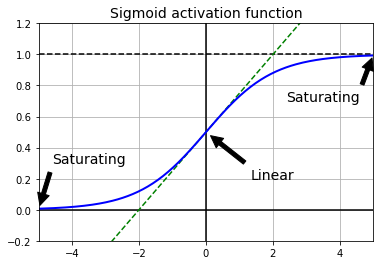

In [42]:
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.savefig("images/activations/sigmoid_saturation_plot.png", dpi=300)
plt.show()

When using the Sigmoid function for hidden layers, it is a good practice to use a “Xavier Normal” or “Xavier Uniform” weight initialization (also referred to Glorot initialization, named for Xavier Glorot) and scale input data to the range 0-1 (e.g. the range of the activation function) prior to training.

## Softmax function
The softmax function outputs a vector of values that sum to 1.0 that can be interpreted as probabilities of class membership.

It is related to the argmax function that outputs a 0 for all options and 1 for the chosen option. Softmax is a “softer” version of argmax that allows a probability-like output of a winner-take-all function.

As such, the input to the function is a vector of real values and the output is a vector of the same length with values that sum to 1.0 like probabilities.

In [63]:
def softmax(x):
	return np.exp(x) / np.sum(np.exp(x))

Target labels used to train a model with the softmax activation function in the output layer will be vectors with 1 for the target class and 0 for all other classes.

## Hyperbolic Tangent (Tanh) function
The hyperbolic tangent activation function is also referred to simply as the Tanh (also “tanh” and “TanH“) function.

It is very similar to the sigmoid activation function and even has the same S-shape.

The function takes any real value as input and outputs values in the range -1 to 1. The larger the input (more positive), the closer the output value will be to 1.0, whereas the smaller the input (more negative), the closer the output will be to -1.0.

In [47]:
def tanh(z):
    return ((np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z)))

(-5.0, 5.0, -1.2, 1.2)

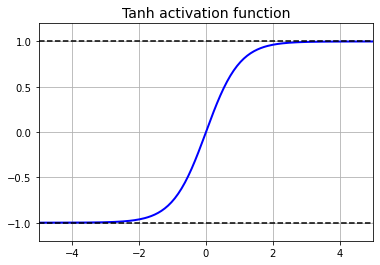

In [58]:
plt.plot(z, tanh(z), "b-", linewidth=2)
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.grid(True)
plt.title("Tanh activation function", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.savefig("images/activations/tanh_saturation_plot.png", dpi=300)
plt.show()

When using the TanH function for hidden layers, it is a good practice to use a “Xavier Normal” or “Xavier Uniform” weight initialization (also referred to Glorot initialization, named for Xavier Glorot) and scale input data to the range -1 to 1 (e.g. the range of the activation function) prior to training.

## Rectified Linear Unit (ReLU) function
The rectified linear activation function, or ReLU activation function, is perhaps the most common function used for hidden layers.

It is common because it is both simple to implement and effective at overcoming the limitations of other previously popular activation functions, such as Sigmoid and Tanh. Specifically, it is less susceptible to *vanishing gradients* that prevent deep models from being trained, although it can suffer from other problems like saturated or “dead” units.

In [67]:
def ReLU(z):
	return max(0.0, z)

When using the ReLU function for hidden layers, it is a good practice to use a “He Normal” or “He Uniform” weight initialization and scale input data to the range 0-1 (normalize) prior to training

## Leaky ReLU function
the ReLU activation function is not perfect. It suffers from a problem known as the dying ReLUs: during training, some neurons effectively “die,” meaning they stop outputting anything other than 0. In some cases, you may find that half of your network’s neurons are dead, especially if you used a large learning rate. A neuron dies when its weights get tweaked in such a way that the weighted sum of its inputs are negative for all instances in the training set. When this happens, it just keeps outputting zeros, and Gradient Descent does not affect it anymore because the gradient of the ReLU function is zero when its input is negative.

To solve this problem, you may want to use a variant of the ReLU function, such as the *leaky ReLU*. The hyperparameter $\alpha$ defines how much the function “leaks”: it is the slope of the function for z < 0 and is typically set to 0.01. This small slope ensures that leaky ReLUs never die; they can go into a long coma, but they have a chance to eventually wake up.

In fact, setting $\alpha$ = 0.2 (a huge leak) seemed to result in better performance than $\alpha$ = 0.01 (a small leak).

In [34]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

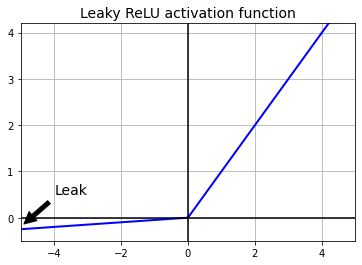

In [43]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

plt.savefig("images/activations/leaky_relu_plot.png", dpi=300)
plt.show()

## Randomized Leaky ReLU (RReLU) function
Similar to Leaky ReLU activation function, where $\alpha$ is picked randomly in a given range during training and is fixed to an average value during testing. RReLU also performed fairly well and seemed to act as a regularizer (reducing the risk of overfitting the training set). 

## Parametric Leaky ReLU (PReLU) function
Similar to ReLU, where $\alpha$ is authorized to be learned during training (instead of being a hyperparameter, it becomes a parameter that can be modified by backpropagation like any other parameter). PReLU was reported to strongly outperform ReLU on large image datasets, but on smaller datasets it runs the risk of overfitting the training set.

## Exponential Linear Unit  (ELU) function
ELU outperformed all the ReLU variants in the authors’ experiments: training time was reduced, and the neural network performed better on the test set.

The ELU activation function looks a lot like the ReLU function, with a few major differences:
* It takes on negative values when z < 0, which allows the unit to have an average output closer to 0 and helps alleviate the vanishing gradients problem. The hyperparameter α defines the value that the ELU function approaches when z is a large negative number. It is usually set to 1, but you can tweak it like any other hyperparameter.
* It has a nonzero gradient for z < 0, which avoids the dead neurons problem.
* If α is equal to 1 then the function is smooth everywhere, including around z = 0, which helps speed up Gradient Descent since it does not bounce as much to the left and right of z = 0.

The main drawback of the ELU activation function is that it is slower to compute than the ReLU function and its variants (due to the use of the exponential function). Its faster convergence rate during training compensates for that slow computation, but still, at test time an ELU network will be slower than a ReLU network.

In [23]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

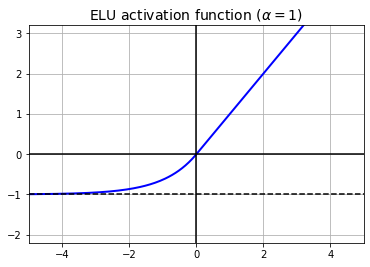

In [32]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.savefig("images/activations/elu_plot.png", dpi=300)
plt.show()

## SELU function
SELU is a scaled variant of the ELU activation function. The authors of [2017 paper](https://arxiv.org/abs/1706.02515) - Günter Klambauer: showed that if you build a neural network composed exclusively of a stack of dense layers, and if all hidden layers use the SELU activation function, then the network will *self-normalize*: the output of each layer will tend to preserve a mean of 0 and standard deviation of 1 during training, which solves the vanishing/exploding gradients problem. As a result, the SELU activation function often significantly outperforms other activation functions for such neural nets (especially deep ones). There are, however, a few conditions for self-normalization to happen (see the paper for the mathematical justification):
* The input features must be standardized (mean 0 and standard deviation 1).
* Every hidden layer’s weights must be initialized with LeCun normal initialization. In Keras, this means setting `kernel_initializer="lecun_normal"`.
* The network’s architecture must be sequential. Unfortunately, if you try to use SELU in nonsequential architectures, such as recurrent networks or networks with skip connections (i.e., connections that skip layers, such as in Wide & Deep nets), self-normalization will not be guaranteed, so SELU will not necessarily outperform other activation functions.
* The paper only guarantees self-normalization if all layers are dense, but some researchers have noted that the SELU activation function can improve performance in convolutional neural nets as well .

In [36]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [37]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

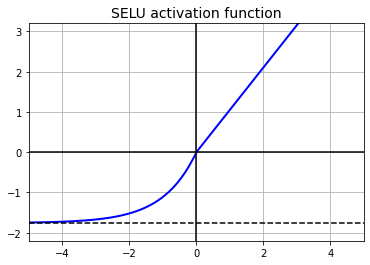

In [44]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.savefig("images/activations/selu_plot.png", dpi=300)
plt.show()

## How to choose activation?
* Activation functions are a key part of neural network design. 
* The modern default activation function for hidden layers is the ReLU function. 
* The activation function for output layers depends on the type of prediction problem.

### Activation for Hidden Layers
A hidden layer in a neural network is a layer that receives input from another layer (such as another hidden layer or an input layer) and provides output to another layer (such as another hidden layer or an output layer). A neural network may have zero or more hidden layers. Typically, a differentiable nonlinear activation function is used in the hidden layers of a neural network. This allows the model to learn more complex functions than a network trained using a linear activation function.

There are perhaps three activation functions you may want to consider for use in hidden layers; they are:
* Rectified Linear Activation (ReLU)
* Logistic (Sigmoid)
* Hyperbolic Tangent (Tanh)
This is not an exhaustive list of activation functions used for hidden layers, but they are the most commonly used.

A neural network will almost always have the same activation function in all hidden layers.

It is most unusual to vary the activation function through a network model.

Traditionally, the sigmoid activation function was the default activation function in the 1990s. Perhaps through the mid to late 1990s to 2010s, the Tanh function was the default activation function for hidden layers.

Both the sigmoid and Tanh functions can make the model more susceptible to problems during training, via the so-called vanishing gradients problem.

The activation function used in hidden layers is typically chosen based on the type of neural network architecture.

Modern neural network models with common architectures, such as MLP and CNN, will make use of the ReLU activation function, or extensions.

Recurrent networks still commonly use Tanh or sigmoid activation functions, or even both. For example, the LSTM commonly uses the Sigmoid activation for recurrent connections and the Tanh activation for output.
* **Multilayer Perceptron (MLP)**: ReLU activation function.
* **Convolutional Neural Network (CNN)**: ReLU activation function.
* **Recurrent Neural Network**: Tanh and/or Sigmoid activation function.

If you’re unsure which activation function to use for your network, try a few and compare the results.

### Activation for Output Layers
The output layer is the layer in a neural network model that directly outputs a prediction.

All feed-forward neural network models have an output layer.

There are perhaps three activation functions you may want to consider for use in the output layer; they are:
* Linear
* Logistic (Sigmoid)
* Softmax

This is not an exhaustive list of activation functions used for output layers, but they are the most commonly used.

You must choose the activation function for your output layer based on the type of prediction problem that you are solving.

Specifically, the type of variable that is being predicted.

For example, you may divide prediction problems into two main groups, predicting a categorical variable (classification) and predicting a numerical variable (regression).

If your problem is a regression problem, you should use a linear activation function.

* **Regression**: One node, linear activation.

If your problem is a classification problem, then there are three main types of classification problems and each may use a different activation function.

Predicting a probability is not a regression problem; it is classification. In all cases of classification, your model will predict the probability of class membership (e.g. probability that an example belongs to each class) that you can convert to a crisp class label by rounding (for sigmoid) or argmax (for softmax).

If there are two mutually exclusive classes (binary classification), then your output layer will have one node and a sigmoid activation function should be used. If there are more than two mutually exclusive classes (multiclass classification), then your output layer will have one node per class and a softmax activation should be used. If there are two or more mutually inclusive classes (multilabel classification), then your output layer will have one node for each class and a sigmoid activation function is used.

* **Binary Classification**: One node, sigmoid activation.
* **Multiclass Classification**: One node per class, softmax activation.
* **Multilabel Classification**: One node per class, sigmoid activation.

# The Vanishing/Exploding Gradients Problems
the backpropagation algorithm works by going from the output layer to the input layer, propagating the error gradient along the way. Once the algorithm has computed the gradient of the cost function with regard to each parameter in the network, it uses these gradients to update each parameter with a Gradient Descent step.

* **Vanishing gradients problem**: gradients often get *smaller and smaller* as the algorithm progresses down to the lower layers. As a result, the Gradient Descent update leaves the lower layers’ connection weights virtually unchanged,
and training never converges to a good solution. 

* **Exploding gradients problem**: the gradients can grow *bigger and bigger* until layers get insanely large weight updates and the algorithm diverges.

## Glorot and He Initialization
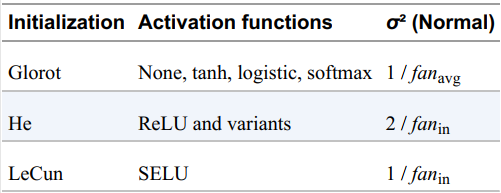

## Batch Normalization
Sergey Ioffe and Christian Szegedy proposed a technique called [Batch Normalization (BN)](https://arxiv.org/abs/1502.03167). The technique consists of adding an operation in the model just before or after the activation function of each hidden layer. This operation simply zerocenters and normalizes each input, then scales and shifts the result using two new parameter vectors per layer: one for scaling, the other for shifting. In other words, the operation lets the model learn the optimal scale and mean of each of the layer’s inputs. 

In many cases, if you add a BN layer as the very first layer of your neural network, you do not need to standardize your training set (e.g., using a `StandardScaler`); the BN layer will do it for you (well, approximately, since it only looks at one batch at a time, and it can also rescale and shift each input feature).

In order to zero-center and normalize the inputs, the algorithm needs to
estimate each input’s mean and standard deviation. It does so by evaluating
the mean and standard deviation of the input over the current mini-batch
(hence the name “Batch Normalization”). The whole operation is
summarized step by step in Equation: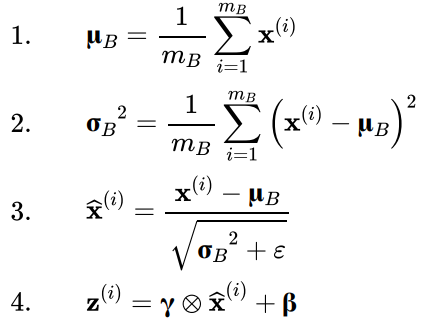
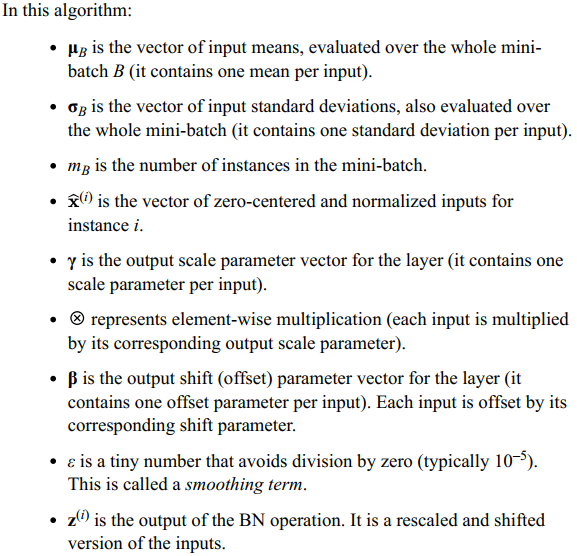

In [1]:
import keras
keras.layers.BatchNormalization()

## Gradient Clipping
Another popular technique to mitigate the exploding gradients problem is to clip the gradients during backpropagation so that they never exceed some threshold. This is called **Gradient Clipping**. This technique is most often used in recurrent neural networks, as Batch Normalization is tricky to use in RNNs.

In [2]:
optimizer = keras.optimizers.SGD(clipvalue=1.0) # [-1, 1]

In [3]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

### Adaptive  gradient clipping (AGC)
[In paper 2021](https://arxiv.org/pdf/2102.06171.pdf) Brock, A, De, S., Smith, S. K, & Simonyan, K. supposed technique to auto-find clipping value. 

In addition, it can replace BN when being used with:
* Dropout technique.
* Sharpnes-Aware Minimization (SAM) optimizer (with some modification).

# Pretrained Layers

## Transfer Learning
* 1. Find an **existing NN**.
* 2. **Reuse the lower layers (near input layer) and other parameters** of this network.

It will not only **speed up training** considerably, but also require significantly **less training data**.

Example approach:
* 1. First, **freeze all the hidden layers** (i.e., make their weights non-trainable).
* 2. Then try **unfreezing 1 or 2 top hidden layers.**

Repeat this step until

Notes:
* The **more training data** you have,  the **more layers**.
* May **reduce the learning rate** when you unfreeze reused layers.

## Faster optimizers

In [13]:
[m for m in dir(keras.optimizers) if not m.startswith("_")]

['Adadelta',
 'Adagrad',
 'Adam',
 'Adamax',
 'Ftrl',
 'Nadam',
 'Optimizer',
 'RMSprop',
 'SGD',
 'deserialize',
 'get',
 'schedules',
 'serialize']

Speeding-up methods:
* Using a good **initialization** strategy.
* Using good **activation** functions: ReLU
* Using **Batch Normaization**.
* Resuing parts of a pretrained network (**tranfer learning**).
* Using a **faster optimizer** than the regular Gradient Descent optimizer.

### Momentum optimization
Inspiration: a ball rolling down a gentle slope. It will start slowly, but it will quickly **get momentum** untill it reaches a terminal velocity (if there is some **friction**).

Regular **Gradient descent** update: 

**Momentum** update:
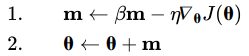

$\beta$ is called the **momentum**, which must be set between 0 (high friction) and 1 (no friction). A typical momentum value is 0.9. You can easily verify that if the gradient remains constant, the terminal velocity (i.e., the maximum size of the weight updates) is equal to that gradient multiplied by the learning rate η multiplied by $\frac{1} {1−β}$ (ignoring the
sign). For example, if β = 0.9, then the terminal velocity is equal to 10 times
the gradient times the learning rate, so momentum optimization ends up
going 10 times faster than Gradient Descent! This allows momentum
optimization to escape from plateaus much faster than Gradient Descent.

In [14]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

Due to the momentum, the optimizer may overshoot a bit, then come back, overshoot again, and oscillate like this many times before stabilizing at the minimum. This is one of the reasons it’s good to have a bit of friction in the system: it gets rid of these oscillations and thus speeds up convergence.

### Nesterov momentum optimization
One small variant to momentum optimization. proposed by Yurii Nesterov in 1983, is almost always **faster** than **vanilla momentum optimization**. The *Nesterov Accelerated Gradient* (NAG) method, also known as *Nesterov momentum optimization*
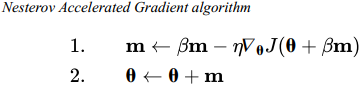

Note that momentum vector **m** is poiting to the optimum (like the gradient vector).

This small tweak works because in general the momentum vector will be pointing in the right direction (i.e., toward the optimum), so it will be slightly more accurate to use the gradient measured a bit farther in that direction rather than the gradient at the original position.

In [15]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

### AdaGrad
Consider the elongated bowl problem again: Gradient Descent starts by quickly going down the steepest slope, which does not point straight toward the global optimum, then it very slowly goes down to the bottom of the valley. [The AdaGrad algorithm](https://jmlr.org/papers/v12/duchi11a) achieves this correction by scaling down the gradient vector along the
steepest dimensions.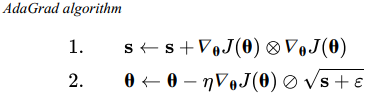

Drawback: AdaGrad frequently performs well for simple quadratic problems, but it often **stops too early** when training neural networks. The learning rate gets scaled down so much that the algorithm ends up stopping entirely before
reaching the global optimum, you **should not use** it to train deep neural networks (it may be efficient for simpler tasks such as Linear Regression, though).

In [1]:
optimizer = keras.optimizers.Adagrad(lr=0.001)

### RMSprop
As we’ve seen, AdaGrad runs the risk of slowing down a bit too fast and never converging to the global optimum. The RMSProp algorithm fixes this by accumulating only the gradients from the most recent iterations (as opposed to all the gradients since the beginning of training). It does so by using exponential decay in the first step.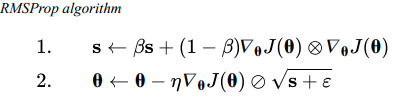

In [18]:
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

### Adam optimizer
[Adaptive moment estimation (Adam)](https://arxiv.org/abs/1412.6980): **combines** momentum optimizatioin and RMSproop. 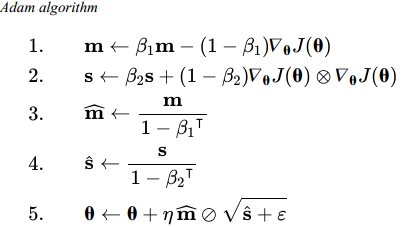

Note: Adam is an **adaptive learning rate** algorithm, so it requires **less tuning** of the learning rate.

In [19]:
optimizer = keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999)

beta_1: momentum value.

beta_2: RMSprop value.

### AdaMax optimization

In [4]:
optimizer = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999)

### Nadam optimization
Nadam optimization is Adam optimization plus the Nesterov trick, so it will often converge slightly faster than Adam. In [his report introducing this technique](http://cs229.stanford.edu/proj2015/054_report.pdf), the researcher Timothy Dozat compares many different optimizers on various tasks and finds that Nadam generally outperforms Adam but is sometimes outperformed by RMSProp.

In [5]:
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)

Table compares all the optimizers we’ve discussed so far (* is bad, **
is average, and *** is good).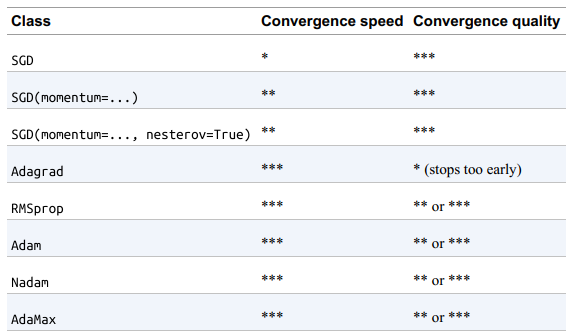

### Learning Rate Scheduling

#### Time-based decay scheduling
Computes learning rate η at an iteration i as: $$ η(i) =  \frac{η_0}{1 + d * i}$$
where $η_0$ is the initial learning rate, *d* is the decay factor (a small positive number).

In [3]:
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-3) # defaut decay=0
# keras update lr every batch iter, NOT every epoch

#### Exponential scheduling\
Computes learning rate η at an iteration i as: $$η(i) = η_0 * d^{i/s}$$
where $η_0$ is the initial learning rate, *d* is the decay rate, *s* is the decay step.

For example, with d = 0.1,
* After *s* iterations, the learning rate $η = η_0 * 0.1^{i/s}$.
So the larger s, the slower the loss and vice versa.

In [4]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.1, decay_rate=0.9, decay_steps=10000)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)
# keras update lr every batch iter, NOT every epoch

#### Piecewise constant scheduling
Use a **constant learning rate** for a number of epochs, e.g., η =0.1 for 5 epochs, then a smaller η = 0.001 for 50 epochs, and so on. 

This optimizer is very effective if you understand your data well, and conversely you have to tuning more to get better hyperparameters.

In [5]:
lr_schedule = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[10000, 1100], values=[1.0, 0.5, 0.1])
# lr=0.1 for first 10001 steps, 
# 0.5 for the next 1000 step, 
# and 0.1 for any additional steps.
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

#### Performance scheduling
Similar to Piecewise constant scheduling, but the learing rates are decided **by performance**:

Measure the validation loss every N steps, then it decrease the learning rate.

In [7]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patient=3)
# multiply the lr by 0.5 
# when the validation loss does not improve for 3 consecutive epochs

#### 1cycle scheduling
This optimizer is worth using for training. Because its speed is very fast.
* 1. **Starts by increasing** the initial learning rate $η_0$ lineary up to $η_M$ halfway through training.
* 2. Then **decreases** the learning rate **linearly down to $η_0$** again during the second half of training.
* 3. Finishes the **last few epochs** by **linearly dropping** the rate down **by several orders of magnitude**.

Note: you definitely have to choose  $η_0$ = **$η_{good}$** = **$η_{diverge}$** / 2 and $η_M$ = $η_{good}$. You can use **large batch_size (>32)** only for with 1cycle scheduling

In [9]:
# Find a good learning rate
def qFindLearningRate(model, X_train, y_train, increase_factor = 1.005, batch_size=32, fig_name='find_lr'):
    # Create a callback to increase the learning rate after each batch, store losses to plot later
    class IncreaseLearningRate_cb(keras.callbacks.Callback):
        def __init__(self, factor):
            self.factor = factor
            self.rates = []
            self.losses = []
        def on_batch_end(self, batch, logs):
            K = keras.backend
            self.rates.append(K.get_value(self.model.optimizer.lr))
            self.losses.append(logs["loss"])
            K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)
    increase_lr = IncreaseLearningRate_cb(factor=increase_factor)

    # Train 1 epoch
    history = model.fit(X_train, y_train, epochs=1, batch_size=batch_size, callbacks=[increase_lr])

    # Plot losses after training batches. 
    # NOTE: a batch has a different learning rate 
    from statistics import median
    plt.plot(increase_lr.rates, increase_lr.losses)
    plt.gca().set_xscale('log')
    #plt.hlines(min(increase_lr.losses), min(increase_lr.rates), max(increase_lr.rates))
    plt.axis([min(increase_lr.rates), max(increase_lr.rates), min(increase_lr.losses), median(increase_lr.losses)])
    plt.grid()
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")
    plt.savefig(fig_name, dpi=300)
    plt.show()
    return increase_lr

In [8]:
K = keras.backend
class MyLrDecay(keras.callbacks.Callback):
    # This scheduling is the same as EXPONENTIAL decay scheduling
    def __init__(self, decay_rate=0.95, decay_steps=10000):
        super().__init__()
        self.decay_rate=decay_rate
        self.decay_steps=decay_steps
        
    def on_batch_begin(self, batch, logs=None):
        # NOTE: the 'batch' argument is reset at each epoch
        lr = K.get_value(self.model.optimizer.lr)
        K.set_value(self.model.optimizer.lr, lr*self.decay_rate**(1/self.decay_steps))
        
    def on_epoch_end(self, epoch, logs=None): # to use tensorboard
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)
        

In [10]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

# Regularization techniques for NNs

## Early stopping

## Batch normalization

## l1 and l2 regularization
l1 regularization: $$J(\theta) = loss(\theta) + \alpha\sum_{i=1}^{n}|\theta_i|$$
l2 regularization: $$J(\theta) = loss(\theta) + \alpha\sum_{i=1}^{n}\theta_i^2$$

In [14]:
layer = keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal", \
                          kernel_regularizer=keras.regularizers.l1(0.01)) # alpha=0.01
layer = keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal", \
                          kernel_regularizer=keras.regularizers.l2(0.02)) # alpha=0.02

In [19]:
layer = keras.layers.Dense(100, activation="relu", kernel_initializer="he_uniform", \
                          kernel_regularizer=keras.regularizers.l1_l2(0.01, 0.02)) #alpha1=0.01, alpha2=0.02

## Max-norm regularization
For each neuron, max-norm regularization scales its weight vector by: $$ w = \frac{w}{|w|_2}r$$
to force the **l2-norm** of the neuron's weights $||w||_2$ < r => **Reducing r** helps **reduce overfitting**

In [22]:
keras.layers.Dense(100, kernel_constraint=keras.constraints.max_norm(1.))

## Dropout
* Popular
* Effective
* Simple: at every training step, every neuron has a **probability p of the being temporarity "dropped out"**. 
p called the **dropout rate**.

After training, dropout is disabled

Why does it work?
* 1. Not focus on only a part of the network.
* 2. Work as an ensemble of nets.

TIP:
* **Increase the dropout rate** in case of **overfitting**.
* May try: **Increase the dropout rate** for **large layer**.
* Many state-of-the-art architectures **only use dropout after last hidden layer**.
* Dropout does tend to slow training

In [3]:
keras.layers.Dropout(rate=0.2) # remove 20% neurons

Summary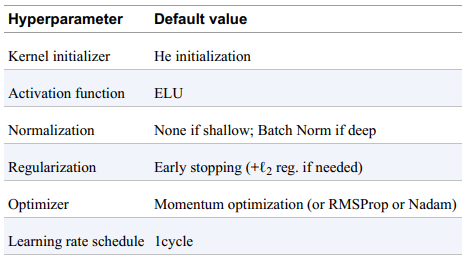

If you **need light and fast models**:
* 1. Use **l1 regulization** (and optionally zero out the tiny weights after training) to create **sparse models**.
* 2. Use **Tensorflow Model Optimization Toolkit (TF-MOT)** to create an even **sparser model**.
* 3. Use a sparser model with **few layers**, leaky ReLU or ReLU activation, and **reduce the float precision from 32 bits to 16 or 8 bits** to create a model that performs **lightning-fast predictions**.